### **Задание 1**

1. Равенство коэффициента корреляции Пирсона между двумя случайными величинами вединице означает, что любая из этих величин может быть линейно выражена через другую в виде: $X = aY + b$, где $a, b \in \mathbb{R}$ и $a > 0$.

2. Корреляция Пирсона оценивается для непрерывных случайных величин, в основе корреляции Спирмена лежат ранги вариационных рядов для двух случайных величин, которые могут быть как непрерывными, так и дискретными порядковыми.

   Корреляция Спирмена может применяться как для дискретных порядковых величин, так и для непрерывных. В отличие от коэффициента корреляции Пирсона, коэффициент корреляции Спирмена позволяет оценить наличие не только линейной, но и любой другой монотонной зависимости. Кроме того, он не зависит от выбросов в данных - только от их рангов, тогда как коэффициент корреляции Пирсона сильно зависит от них (может заметно меняться при исключении выбросов).
   
   Соответственно, воспользоваться коэффициентом корреляции Спирмена лучше в следующих случаях:
   - оценивается корреляция между порядковыми случайными величинами,
   - оценивается наличие любой монотонной зависимости, не только линейной,
   - в данных есть выбросы.

3. Коэффициент детерминации, или $R^2$, - это доля объяснённой дисперсии в дисперсии зависимой переменной в линейной регрессии. При добавлении новых объясняющих переменных коэффициент детерминации увеличивается или остаётся неизменным, при исключении признаков - уменьшается или остаётся неизменным.

4. Должны выполняться предпосылки Гаусса-Маркова, а именно: 
- математическое ожидание остатков регрессионного уравнения равно 0,
- линейность модели по параметрам,
- независимость остатков между наблюдениями в выборке,
- независимость остатков и объясняющих переменных,
- постоянное значение дисперсии остатков для всех наблюдений.

5. Критерий Фишера проверяет нулевую гипотезу о совместном равенстве всех коэффициентов регрессионного уравнения (весов признаков) нулю.

### **Задание 2**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot 
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
data = pd.read_excel('lifeline.xls')
data.shape

(50, 2)

In [3]:
data.columns

Index(['X', 'Y'], dtype='object')

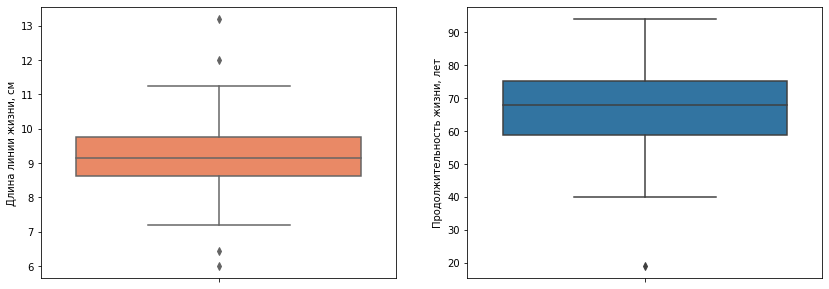

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(ax=ax[0], data=data['X'], color='coral').set(xticklabels='', ylabel='Длина линии жизни, см')
sns.boxplot(ax=ax[1], data=data['Y']).set(xticklabels='', ylabel='Продолжительность жизни, лет')
plt.show();

In [5]:
data['Outlier'] = ((data['X'] > data['X'].quantile(0.75) + 1.5*(data['X'].quantile(0.75)-data['X'].quantile(0.25))) |
(data['X'] < data['X'].quantile(0.25) - 1.5*(data['X'].quantile(0.75)-data['X'].quantile(0.25))) |
(data['Y'] > data['Y'].quantile(0.75) + 1.5*(data['Y'].quantile(0.75)-data['Y'].quantile(0.25))) |
(data['Y'] < data['Y'].quantile(0.25) - 1.5*(data['Y'].quantile(0.75)-data['Y'].quantile(0.25))))

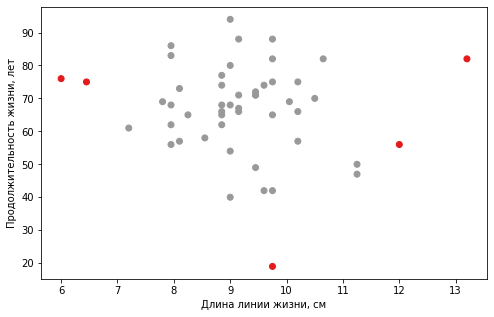

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(data['X'], data['Y'], c=data['Outlier'], cmap='Set1_r')
plt.xlabel('Длина линии жизни, см')
plt.ylabel('Продолжительность жизни, лет')
plt.show();

Видим, что в данных есть выбросы, в том числе в многомерном распределении.

In [7]:
print('Коэффициент корреляции Пирсона без исключения выбросов %.2f' % stats.pearsonr(data['X'], data['Y'])[0])
print('Коэффициент корреляции Пирсона с исключением выбросов %.2f' % stats.pearsonr(data[data['Outlier'] != True]['X'], data[data['Outlier'] != True]['Y'])[0])
print('Коэффициент корреляции Спирмена без исключения выбросов %.2f' % stats.spearmanr(data['X'], data['Y'])[0])
print('Коэффициент корреляции Спирмена с исключением выбросов %.2f' % stats.spearmanr(data[data['Outlier'] != True]['X'], data[data['Outlier'] != True]['Y'])[0])
print('Коэффициент корреляции Кендалла без исключения выбросов %.2f' % stats.kendalltau(data['X'], data['Y'])[0])
print('Коэффициент корреляции Кендалла с исключением выбросов %.2f' % stats.kendalltau(data[data['Outlier'] != True]['X'], data[data['Outlier'] != True]['Y'])[0])

Коэффициент корреляции Пирсона без исключения выбросов -0.12
Коэффициент корреляции Пирсона с исключением выбросов -0.12
Коэффициент корреляции Спирмена без исключения выбросов -0.09
Коэффициент корреляции Спирмена с исключением выбросов 0.01
Коэффициент корреляции Кендалла без исключения выбросов -0.04
Коэффициент корреляции Кендалла с исключением выбросов 0.02


В общем, независимо от выбросов, мы можем говорить об отсутствии корреляции между длиной линии жизни и продолжительности жизни - как линейной, так и какой-либо иной монотонной зависимости.

### **Задание 3**

In [77]:
data = pd.read_csv('auto.csv')
data.shape

(392, 9)

In [78]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [79]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [80]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Вначале разберёмся с категориальными признаками.

In [81]:
data.describe(include=['object'])

,name
count,392
unique,301
top,toyota corolla
freq,5


В данных 301 уникальное название автомобиля - при 392 наблюдениях включать данный признак в анализ не имеет смысла (это будет 300 дамми переменных). Посмотрим, что содержится в названиях:

In [82]:
data['name'].value_counts()

toyota corolla             5
ford pinto                 5
amc matador                5
amc hornet                 4
amc gremlin                4
                          ..
toyota corona mark ii      1
plymouth custom suburb     1
mercury cougar brougham    1
mercury capri v6           1
ford fairmont (man)        1
Name: name, Length: 301, dtype: int64

Попробуем выцепить первое слово из названия - по всей видимости, это будет марка автомобиля.

In [83]:
import re
data['brand'] = [re.findall(r'[a-zA-Z]+', i)[0] for i in data['name']]

In [84]:
data['brand'].value_counts()

ford          48
chevrolet     43
plymouth      31
dodge         28
amc           27
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
mazda         10
oldsmobile    10
peugeot        8
fiat           8
audi           7
volvo          6
chrysler       6
vw             6
saab           4
subaru         4
opel           4
chevy          3
renault        3
mercedes       3
bmw            2
cadillac       2
maxda          2
nissan         1
hi             1
triumph        1
chevroelt      1
toyouta        1
vokswagen      1
capri          1
Name: brand, dtype: int64

Видно, что в названиях есть опечатки/ сокращения - исправим их.

In [85]:
data['brand'].replace(['vw', 'vokswagen', 'chevy', 'chevroelt', 'maxda', 'toyouta'], ['volkswagen', 'volkswagen', 'chevrolet', 'chevrolet', 'mazda', 'toyota'], inplace = True)
data['brand'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
subaru         4
saab           4
opel           4
renault        3
mercedes       3
cadillac       2
bmw            2
capri          1
nissan         1
triumph        1
hi             1
Name: brand, dtype: int64

Так лучше, хотя осталось много малочисленных категорий, поэтому посмотрим дальше по описательной статистике, стоит ли включать этот признак, и если включать, то, возможно, как-то объединить категории.

In [86]:
# отсортируем наблюдения по медиане расхода топлива для соответствующей марки (для наглядности графика ниже)
brand_meds = data.groupby('brand')['mpg'].agg('median').to_frame()
brand_meds.reset_index(inplace=True)
brand_meds.rename(columns = {'mpg': 'brand_med'}, inplace=True)
brand_meds.sort_values('brand_med', ascending=True, inplace=True)
data = data.merge(brand_meds, how='outer', on='brand')
data.sort_values(['brand_med', 'brand'], ascending=[True, True], inplace=True)

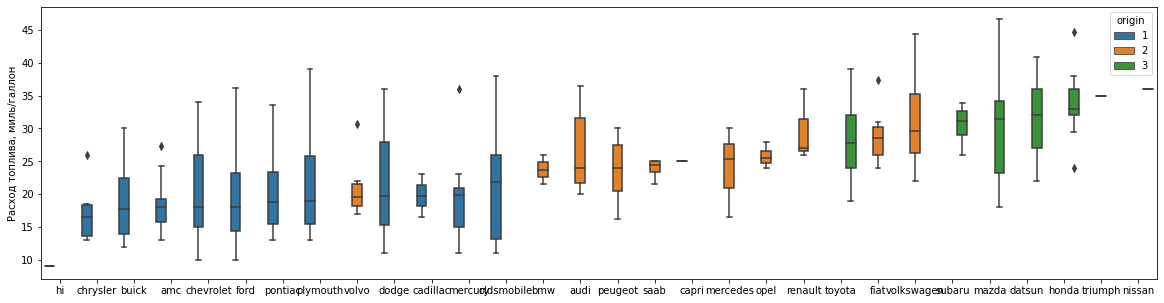

In [87]:
plt.figure(figsize=(20,5))
sns.boxplot(x='brand', y='mpg', data=data, order=brand_meds['brand'], hue='origin').set(xlabel='', ylabel='Расход топлива, миль/галлон');

В целом, заметно, что американские марки имеют, в среднем, меньший расход топлива, а японские - наибольший. Вполне возможно, достаточно будет использовать страну происхождения в качестве объясняющей переменной, а марку не использовать вовсе. В прицнипе, если мы строим именно *предсказательную* модель, то лучше использовать страну происхождения, а не марку, т.к. при появлении какой-то новой марки автомобиля мы уже не сможем предсказать для неё расход топлива по модели с переменной для марки автомобиля. Если же мы хотим не только или не столько *предсказательную*, сколько *этиологическую* модель, то есть модель, объясняющую, с какими характеристиками автомобиля связан расход топлива, тогда можно выбирать между страной происхождения и маркой в зависимости от того, какой из этих признаков лучше проявит себя в регрессии.

Теперь разберёмся с годом производства.

In [88]:
data['year'].value_counts().sort_index()

70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: year, dtype: int64

In [89]:
data['year_cat'] = pd.cut(data['year'], bins=list(range(70, 84)), right=False, labels=['19' + str(i) for i in range(70, 83)])

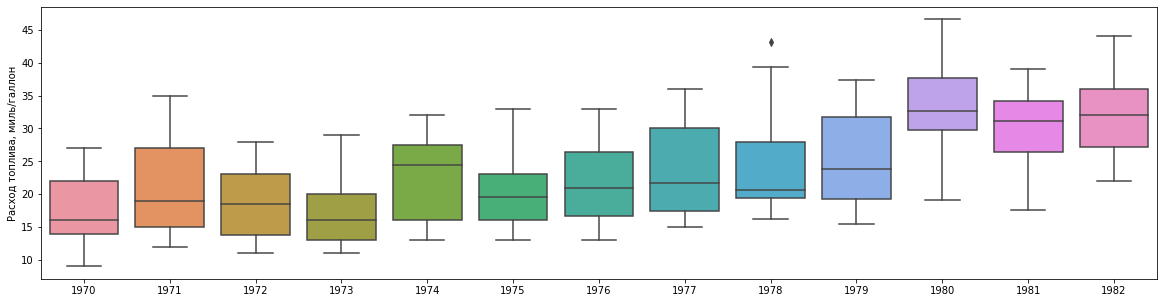

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x='year_cat', y='mpg', data=data).set(xlabel='', ylabel='Расход топлива, миль/галлон');

Некоторая тенденция к увеличению расхода топлива со временем есть, но, возможно, она нелинейная, поэтому я бы не включала год производства в регрессию в виде количественной переменной - лучше в виде дамми переменных - если не для каждого года, то, возможно, для периодов 1970-1973, 1974-1979, 1980-1982. Опять же, если мы строим *предсказательную* модель, тогда лучше использовать год как количественную переменную (возможно, с нелинейным трендом), чтобы при появлении автомобиля с более поздним или более ранним годом выпуска, чем в имеющихся данных, мы могли предсказать средний расзод топлива и для него (хотя в любом случае out-of-sample предсказания - не очень хорошая штука). Если же речь об *этиологической* модели, тогда можно использовать год как категориальную переменную или период выпуска автомобиля.

In [91]:
data['period'] = pd.cut(data['year'], bins=[70,74,80,83], right=False, labels=['1970-73', '1974-79', '1980-82'])

In [92]:
data['period'].value_counts()

1974-79    183
1970-73    124
1980-82     85
Name: period, dtype: int64

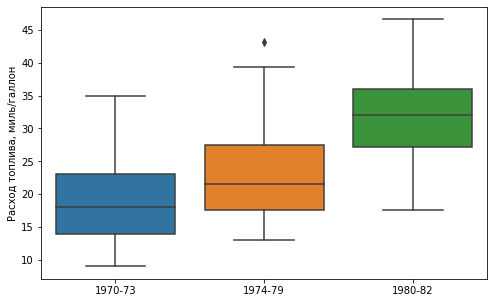

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(x='period', y='mpg', data=data).set(xlabel='', ylabel='Расход топлива, миль/галлон');

Теперь посмотрим на страну происхождения автомобиля.

In [94]:
data['origin'] = pd.cut(data['origin'], bins=[1,2,3,4], right=False, labels=['Америка', 'Европа', 'Япония'])

In [95]:
data['origin'].value_counts().sort_index()

Америка    245
Европа      68
Япония      79
Name: origin, dtype: int64

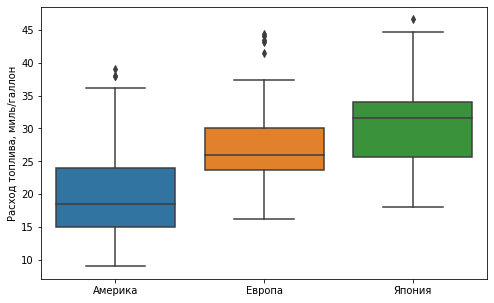

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x='origin', y='mpg', data=data).set(xlabel='', ylabel='Расход топлива, миль/галлон');

Количество цилиндров тоже может рассматриваться как дискретный признак.

In [97]:
data['cylinders'].value_counts().sort_index()

3      4
4    199
5      3
6     83
8    103
Name: cylinders, dtype: int64

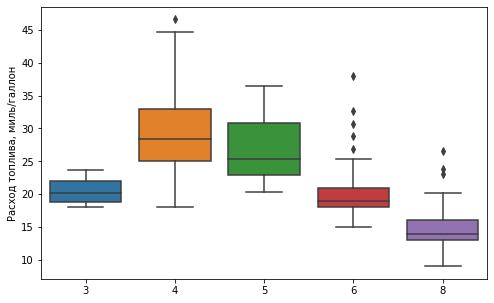

In [98]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cylinders', y='mpg', data=data).set(xlabel='', ylabel='Расход топлива, миль/галлон');

Группы с 3 и 5 цилиндрами довольно малочисленные, поэтому я их объединю в одну группу с автомобилями с 4 цилиндрами.

In [99]:
data['cylinders'] = pd.cut(data['cylinders'], bins=[3,6,8,9], right=False, labels=['3-5', '6', '8'])

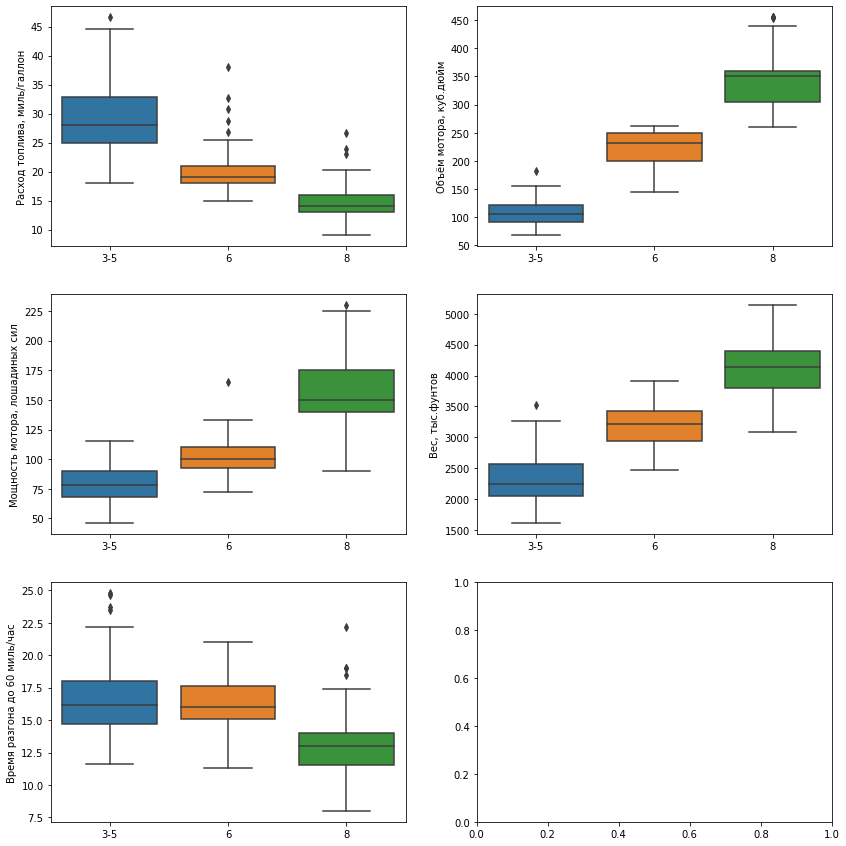

In [100]:
fig, ax = plt.subplots(3, 2, figsize=(14, 15))
sns.boxplot(ax=ax[0][0], x='cylinders', y='mpg', data=data).set(xlabel='', ylabel='Расход топлива, миль/галлон')
sns.boxplot(ax=ax[0][1], x='cylinders', y='displacement', data=data).set(xlabel='', ylabel='Объём мотора, куб.дюйм')
sns.boxplot(ax=ax[1][0], x='cylinders', y='horsepower', data=data).set(xlabel='', ylabel='Мощность мотора, лошадиных сил')
sns.boxplot(ax=ax[1][1], x='cylinders', y='weight', data=data).set(xlabel='', ylabel='Вес, тыс.фунтов')
sns.boxplot(ax=ax[2][0], x='cylinders', y='acceleration', data=data).set(xlabel='', ylabel='Время разгона до 60 миль/час');

Видно, что кол-во цилиндров коррелирует с остальными (количественными) переменными, причём сильнее всего - с объёмом мотора (кол-во цилиндров позволило бы практически идеально разделить автомобили на группы по объёму мотора).

In [101]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'brand', 'brand_med',
       'year_cat', 'period'],
      dtype='object')

Посмотрим на гистограммы и диаграммы рассеяния для количественных признаков.

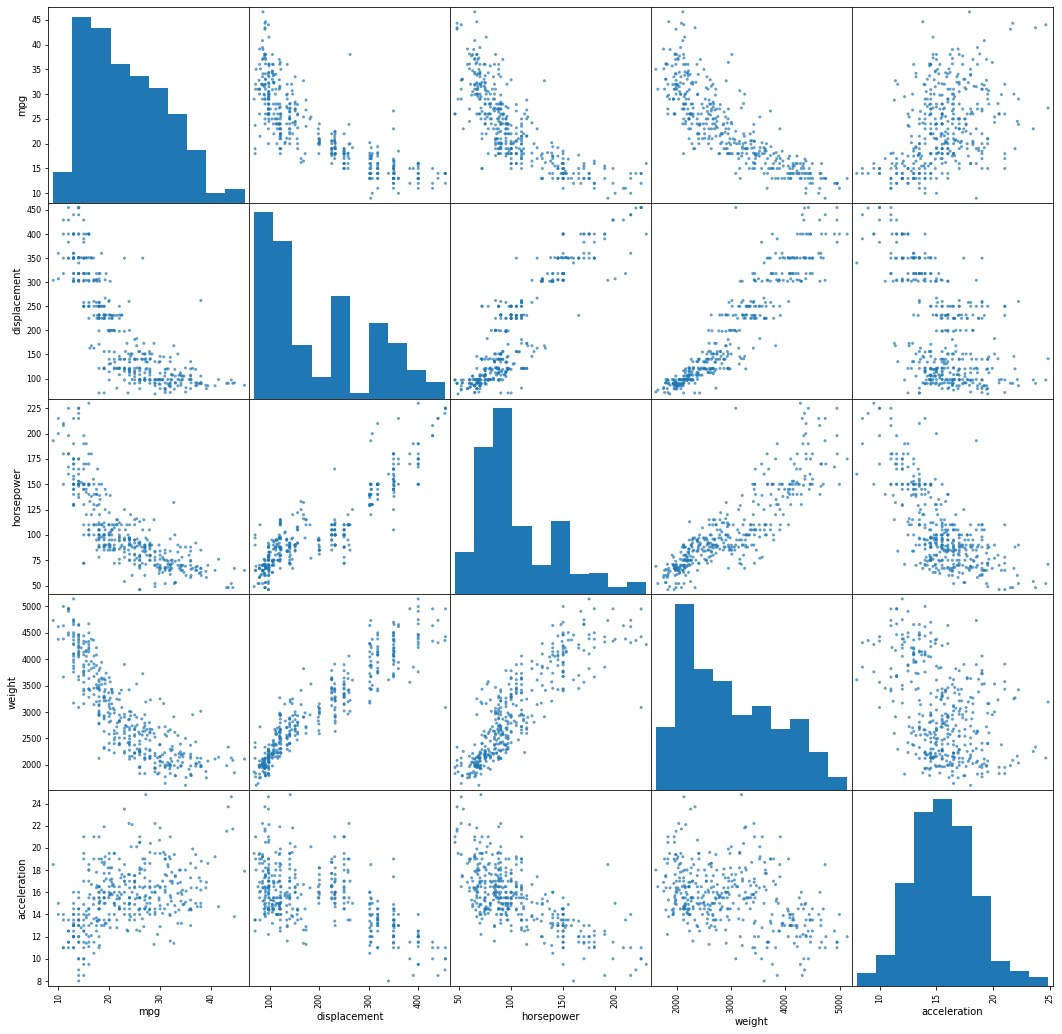

In [102]:
x_num = ['displacement', 'horsepower', 'weight', 'acceleration']
pd.plotting.scatter_matrix(data[['mpg'] + x_num], figsize=(18, 18), alpha=0.7);

Видно, что распределение для всех переменных, кроме acceleration, явно отклоняются от нормального. Также видно, что зависимость расхода топлива от остальных количественных переменных, не является линейной. Попробуем решить эту проблему с помощью логарифмирования соответствующих переменных.

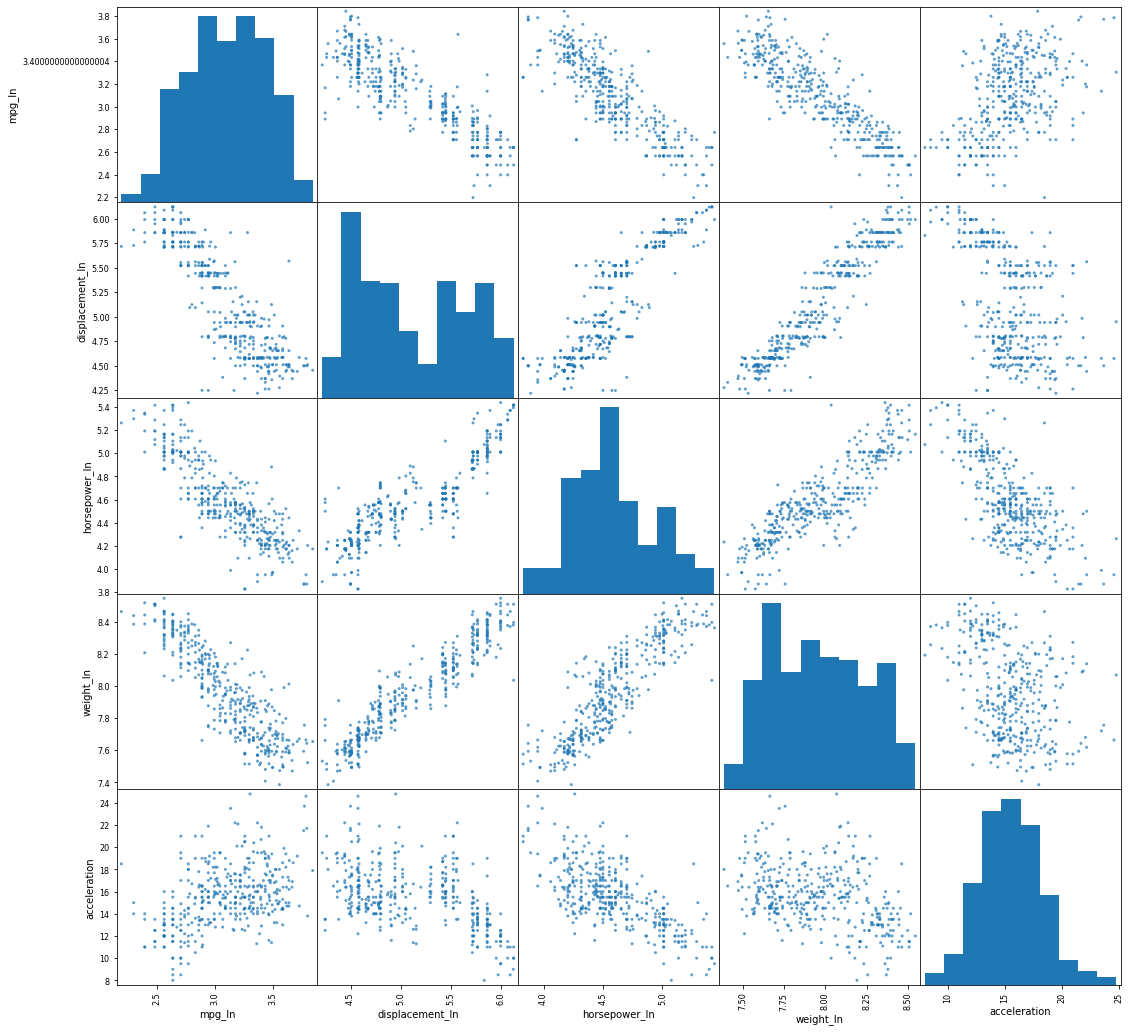

In [103]:
data['mpg_ln'] = np.log(data['mpg'])
data['displacement_ln'] = np.log(data['displacement'])
data['horsepower_ln'] = np.log(data['horsepower'])
data['weight_ln'] = np.log(data['weight'])
x_num = ['displacement_ln', 'horsepower_ln', 'weight_ln', 'acceleration']
pd.plotting.scatter_matrix(data[['mpg_ln'] + x_num], figsize=(18, 18), alpha=0.7);

Таким образом удалось визуально линеаризовать зависимость расзода топлива от остальных количественных переменных. Теперь оценим линейную корреляцию между количественными переменными.

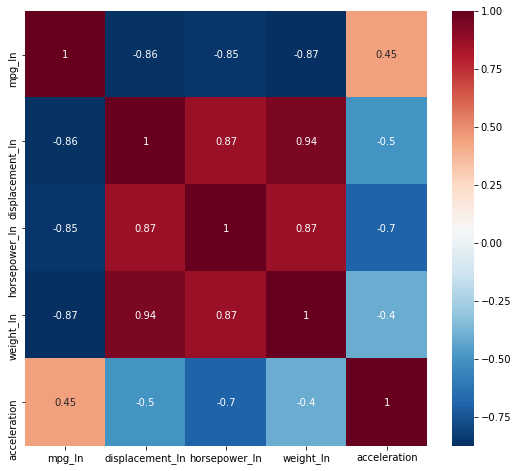

In [104]:
plt.figure(figsize=(9,8))
sns.heatmap(data[['mpg_ln'] + x_num].corr(), annot = True, cmap='RdBu_r');

Расход топлива сильно коррелирует с объёмом мотора, его мощностью и весом (автомобиля?). При этом перечисленные три переменные сильно коррелируют между собой (объём мотора и вес имеют корреляцию, близкую к елинице). Это чревато мультиколлинеарностью (а значит, нарушением одной из предпосылок Гаусса-Марква), поэтому нужно будет отследить, насколько её последствия проявляются при одновременном включении этих объясняющих переменных в регрессию.

Ускорение и мощность двигателя также сильно коррелируют друг с другом.

Базовая спецификация - со всеми объясняющими переменными (если мы ищем именно *предсказательную* модель):

In [105]:
features1 = ['displacement_ln', 'horsepower_ln', 'weight_ln', 'acceleration', 'cylinders', 'origin', 'year']
ols1 = smf.ols('mpg_ln ~ ' + '+'.join(features1), data=data)
ols1_fit_init = ols1.fit()

print(ols1_fit_init.summary())

                            OLS Regression Results                            
Dep. Variable:                 mpg_ln   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     357.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.23e-180
Time:                        18:39:50   Log-Likelihood:                 306.73
No. Observations:                 392   AIC:                            -593.5
Df Residuals:                     382   BIC:                            -553.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7965      0.382  

Базовая спецификация с брендом вместо страны происхождения и годом как категориальной переменной (если мы ищем *этиологическую* модель):

In [153]:
features2 = ['displacement_ln', 'horsepower_ln', 'weight_ln', 'acceleration', 'cylinders', 'brand', 'year_cat']
ols2 = smf.ols('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data=data)
ols2_fit_init = ols2.fit()

print(ols2_fit_init.summary())

                            OLS Regression Results                            
Dep. Variable:                 mpg_ln   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     92.67
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.48e-167
Time:                        19:11:20   Log-Likelihood:                 379.57
No. Observations:                 392   AIC:                            -663.1
Df Residuals:                     344   BIC:                            -472.5
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Во-первых, видим, что указание на возможную мультиколлинеарность присутствует в обеих спецификациях. При этом вторая спецификация выигрывает по adjusted $R^2$ и по AIC.

Для оценки мультиколлинеарности можно использовать variance inflation factor (VIF) для каждого предиктора:

In [155]:
def vif_df(X):
    # calculate variance inflation factor for model matrix (with intercept column)
    vif = pd.DataFrame({'Variable': X.columns})
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

from patsy import dmatrices
y, X1 = dmatrices('mpg_ln ~ ' + '+'.join(features1), data, return_type='dataframe')
vif1 = vif_df(X1)
y, X2 = dmatrices('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data, return_type='dataframe')
vif2 = vif_df(X2)

In [108]:
vif1.sort_values('VIF', ascending=False, inplace=True)
vif1[vif1['VIF'] >= 10]

,Variable,VIF
0,Intercept,4553.357505
5,displacement_ln,25.569906
7,weight_ln,16.829716
6,horsepower_ln,12.417471
2,cylinders[T.8],10.235661


In [109]:
vif2.sort_values('VIF', ascending=False, inplace=True)
vif2[vif2['VIF'] >= 10]

,Variable,VIF
0,Intercept,6657.105071
44,displacement_ln,35.075971
46,weight_ln,24.378017
45,horsepower_ln,17.148317
2,cylinders[T.8],12.933761


Видим, что в обоих случаях мультиколлинеарность присутствует, а значит, стандартные ошибки коэффициентов регрессии (всех, не только при коррелирующих переменных) могут быть завышены, что приводит к более широким доверительным интервалам и возможной статистической незначимости (некоторых) коэффициентов. Поэтому будем последовательно исключать признаки с наибольшим значением VIF - до тех пор, пока для всех переменных он не опустится ниже порогового значения в 10.

In [110]:
features1 = ['horsepower_ln', 'weight_ln', 'acceleration', 'cylinders', 'origin', 'year']
ols1 = smf.ols('mpg_ln ~ ' + '+'.join(features1), data=data)
ols1_fit = ols1.fit()
y, X1 = dmatrices('mpg_ln ~ ' + '+'.join(features1), data, return_type='dataframe')
vif1 = vif_df(X1)
vif1[vif1['VIF'] >= 10]

,Variable,VIF
0,Intercept,4322.601713
5,horsepower_ln,12.416977
6,weight_ln,11.326882


In [161]:
features2 = ['horsepower_ln', 'weight_ln', 'acceleration', 'cylinders', 'brand', 'year_cat']
ols2 = smf.ols('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data=data)
ols2_fit = ols2.fit()
y, X2 = dmatrices('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data, return_type='dataframe')
vif2 = vif_df(X2)
vif2[vif2['VIF'] >= 10]

,Variable,VIF
0,Intercept,5960.009933
44,horsepower_ln,17.144087
45,weight_ln,14.763200


In [128]:
features1 = ['horsepower_ln', 'acceleration', 'cylinders', 'origin', 'year']
ols1 = smf.ols('mpg_ln ~ ' + '+'.join(features1), data=data)
ols1_fit = ols1.fit()
y, X1 = dmatrices('mpg_ln ~ ' + '+'.join(features1), data, return_type='dataframe')
vif1 = vif_df(X1)
vif1[vif1['VIF'] >= 10]

,Variable,VIF
0,Intercept,2019.413748


In [129]:
print(ols1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 mpg_ln   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     381.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.34e-168
Time:                        18:47:54   Log-Likelihood:                 273.59
No. Observations:                 392   AIC:                            -531.2
Df Residuals:                     384   BIC:                            -499.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.4167      0.276  

In [162]:
features2 = ['horsepower_ln', 'acceleration', 'cylinders', 'brand', 'year_cat']
ols2 = smf.ols('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data=data)
ols2_fit = ols2.fit()
y, X2 = dmatrices('mpg_ln ~ ' + '+'.join([i for i in features2 if i != 'brand']) + '+ C(brand, Treatment(reference="ford"))', data, return_type='dataframe')
vif2 = vif_df(X2)
vif2[vif2['VIF'] >= 10]

,Variable,VIF
0,Intercept,2044.24537


In [163]:
print(ols2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 mpg_ln   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     82.96
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-158
Time:                        19:16:35   Log-Likelihood:                 350.70
No. Observations:                 392   AIC:                            -609.4
Df Residuals:                     346   BIC:                            -426.7
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Вторая модель всё ещё выигрывает по $R^2$, adjusted $R^2$ и AIC. Я всё-таки решила не заменять год на период, т.к. внутри периода 1970-1974 есть значимые отличия (между 1970 и 1972-73 гг., например), а 1975-76 гг. незначимо отличаются от 1970 г.

Теперь проверим остатки регрессионного уравнения.

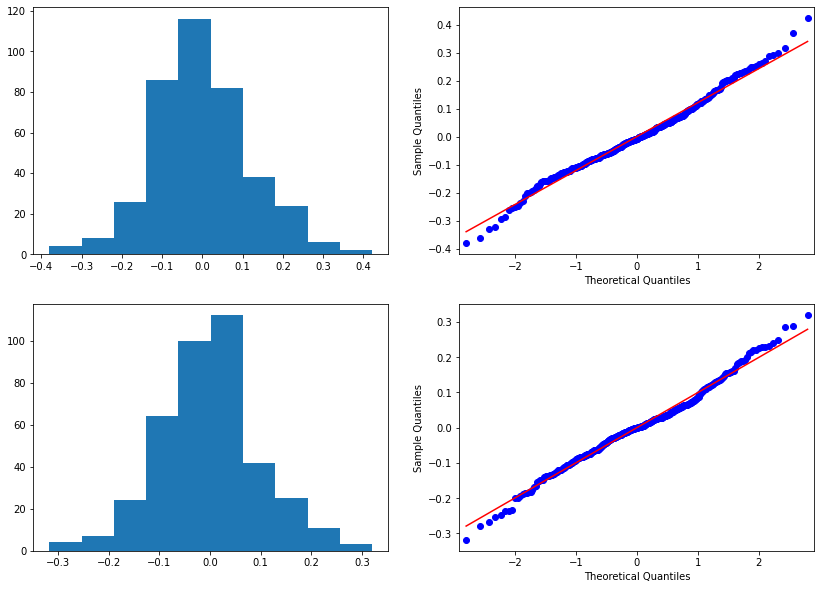

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ols1_fit.resid.hist(ax=ax[0][0], grid=False)
qqplot(ols1_fit.resid, line='r', ax=ax[0][1])
ols2_fit.resid.hist(ax=ax[1][0], grid=False)
qqplot(ols2_fit.resid, line='r', ax=ax[1][1])
plt.show();

Распределение остатков похоже на нормальное, с незначительными отклонениями.

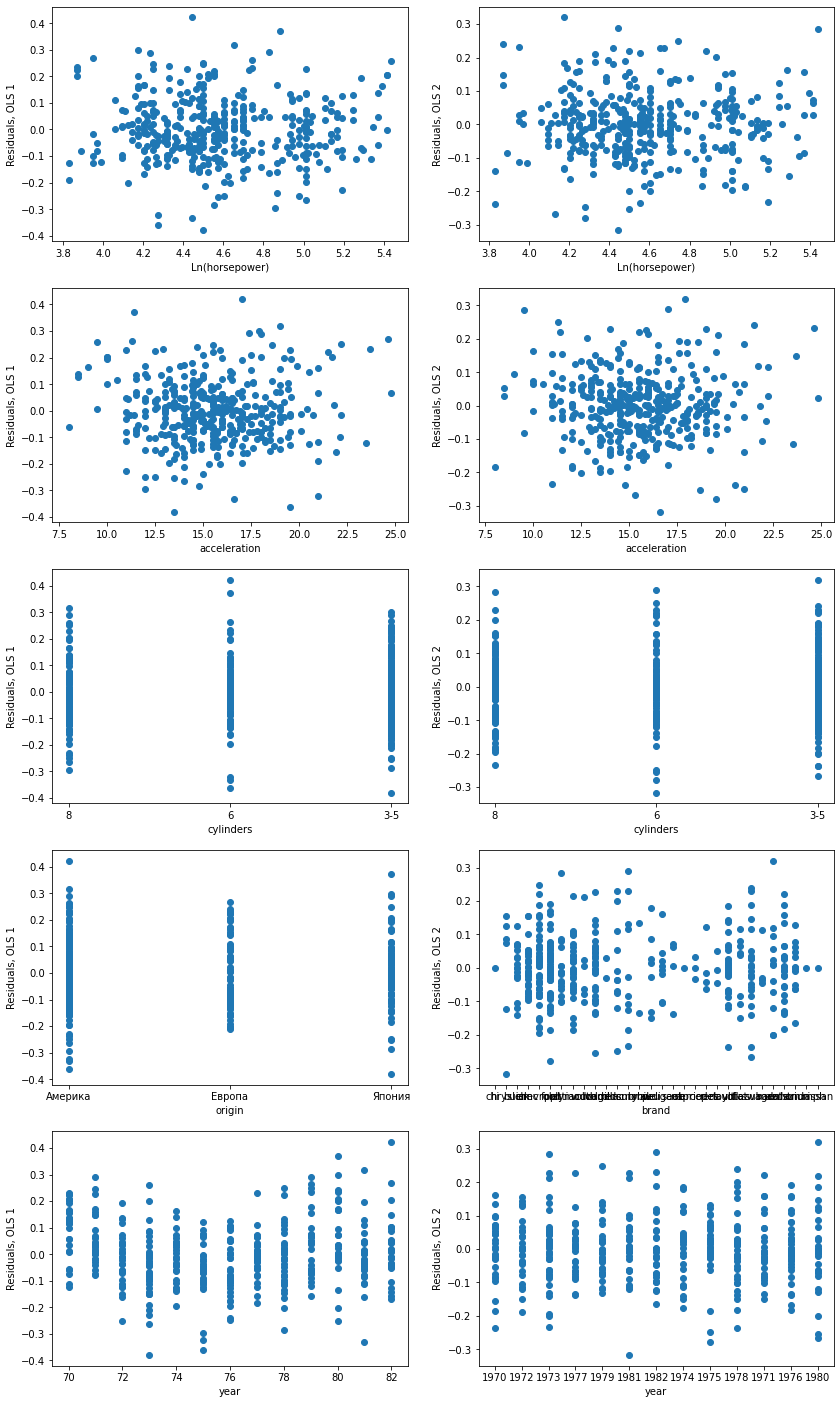

In [117]:
fig, ax = plt.subplots(5, 2, figsize=(14, 25))
ax[0][0].scatter(data['horsepower_ln'], ols1_fit.resid)
ax[0][0].set_xlabel('Ln(horsepower)')
ax[0][0].set_ylabel('Residuals, OLS 1')

ax[0][1].scatter(data['horsepower_ln'], ols2_fit.resid)
ax[0][1].set_xlabel('Ln(horsepower)')
ax[0][1].set_ylabel('Residuals, OLS 2')

ax[1][0].scatter(data['acceleration'], ols1_fit.resid)
ax[1][0].set_xlabel('acceleration')
ax[1][0].set_ylabel('Residuals, OLS 1')

ax[1][1].scatter(data['acceleration'], ols2_fit.resid)
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('Residuals, OLS 2')

ax[2][0].scatter(data['cylinders'], ols1_fit.resid)
ax[2][0].set_xlabel('cylinders')
ax[2][0].set_ylabel('Residuals, OLS 1')

ax[2][1].scatter(data['cylinders'], ols2_fit.resid)
ax[2][1].set_xlabel('cylinders')
ax[2][1].set_ylabel('Residuals, OLS 2')

ax[3][0].scatter(data['origin'], ols1_fit.resid)
ax[3][0].set_xlabel('origin')
ax[3][0].set_ylabel('Residuals, OLS 1')

ax[3][1].scatter(data['brand'], ols2_fit.resid)
ax[3][1].set_xlabel('brand')
ax[3][1].set_ylabel('Residuals, OLS 2')

ax[4][0].scatter(data['year'], ols1_fit.resid)
ax[4][0].set_xlabel('year')
ax[4][0].set_ylabel('Residuals, OLS 1')

ax[4][1].scatter(data['year_cat'], ols2_fit.resid)
ax[4][1].set_xlabel('year')
ax[4][1].set_ylabel('Residuals, OLS 2')

plt.show();

Остатки более или менее случайно распределены вокруг нуля при различных значениях объясняющих переменных, за исключением переменной year для спецификации 1: тут возможна нелинейная зависимость. В принципе, это можно решить с помощью использования категориальной переменной для года (как в спецификации 2) или для периода выпуска автомобиля, но тогда модель нельзя будет использовать для предсказания расхода топлива для автомобилей, произведенных в годы, не входящие в период наблюдения в выборочных данных. И качество первой модели при использовании этих переменных ухудшается, поэтому я решила не менять ничего в ней.

В целом, результаты для первой модели можно интерпретировать следующим образом (приведу результаты для коэффициентов, статистически значимых на 5%-ном уровне значимости):
- автомобили с бОльшим числом цилиндров имеют, в среднем, меньший расход топлива: по сравнению с автомобилями с 3-5 цилинрами машины с 6 цилинрами имеют на 15.5%, а с 8 цилинрами - на 19.6% меньший расход топлива, при прочих равных условиях,
- японские автомобили по сравнению с американскими имеют на 8.1% больший расход топлива, в среднем,
- при увеличении мощности мотора на 1% расход топлива снижается, в среднем, на 62.1%, при прочих равных условиях,
- при увеличении времени разгона до 60 миль/ час на 1 секунду расход топлива уменьшается, в среднем, на 2.6%,
- новые машины имеют, в среднем, больший расход топлива, чем старые: с каждым последующим годом выпуска расход топлива увеличивается на 2.6%.

Эта модель объясняет 87.4% дисперсии расхода топлива.

Результаты для первой модели можно интерпретировать следующим образом (приведу результаты для коэффициентов, статистически значимых на 5%-ном уровне значимости):
- автомобили с бОльшим числом цилиндров имеют, в среднем, меньший расход топлива: по сравнению с автомобилями с 3-5 цилинрами машины с 6 цилинрами имеют на 12.4%, а с 8 цилинрами - на 15.5% меньший расход топлива, при прочих равных условиях,
- расход топлива зависит и от марки автомобиля: похоже, Форд (самая распространённая марка в выборке) имеет наименьший расход топлива (меньше только у Hi, но в выборке только 1 такая машина и её отличие от Форда незначимо) по сравнению с остальными марками (не со всеми различия статистически значимы) - ниже на графике покажу коэффициенты для марок автомобилей,
- при увеличении мощности мотора на 1% расход топлива снижается, в среднем, на 67.8%, при прочих равных условиях,
- при увеличении времени разгона до 60 миль/ час на 1 секунду расход топлива уменьшается, в среднем, на 2.5%,
- по сравнению с машинами, произведенными в 1970 г., машины 1972 и 1973 гг. выпуска имеют, в среднем, на 6.1% и 8.5%, соответственно, меньший расход топлива, а начиная с 1977 г. средний расход топлива значимо увеличился по сравнению с 1970 г. (от 6.9% в 1977 г. до 24.5% в 1982 г.).

Эта модель объясняет 91.5% дисперсии расхода топлива.

In [164]:
print(ols2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 mpg_ln   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     82.96
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-158
Time:                        19:16:51   Log-Likelihood:                 350.70
No. Observations:                 392   AIC:                            -609.4
Df Residuals:                     346   BIC:                            -426.7
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Ниже на графике все марки отсортированы по средней разнице в расходе топлива по сравнению с Фордом, красным выделены столбцы для коэффициентов, статистически значимых на 5%-ном уровне значимости.

In [188]:
def find_brand(text):
    res = re.search(r'C\(brand, Treatment\(reference="ford"\)\)\[T.(.+?)\]', text)
    if res:
        return res.group(1)
    else:
        return 'NULL'

<ipython-input-220-179b1f2eafae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols2_coefs_brand.sort_values(0, ascending=True, inplace=True)


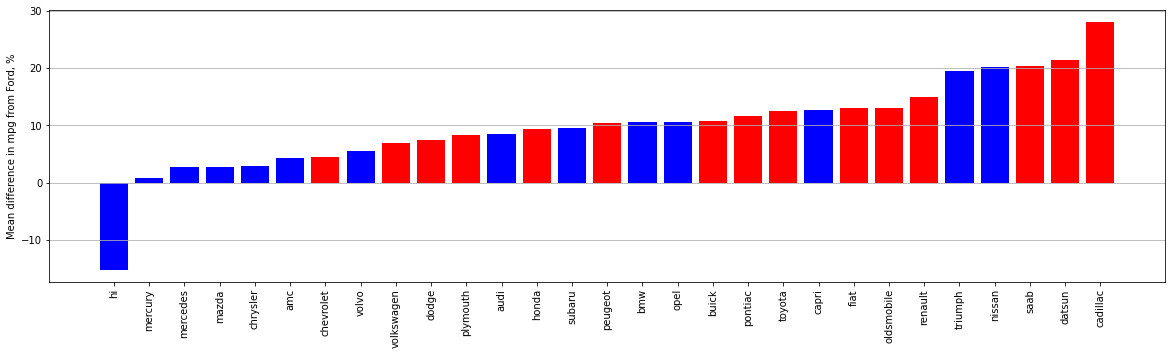

In [220]:
ols2_coefs = ols2_fit.params.to_frame()
ols2_coefs.reset_index(inplace=True)
ols2_coefs['p'] = ols2_fit.pvalues.tolist()
ols2_coefs['sig'] = ols2_coefs['p'] < 0.05
ols2_coefs['brand'] = ols2_coefs['index'].apply(find_brand)
ols2_coefs_brand = ols2_coefs[ols2_coefs['brand'] != 'NULL']
ols2_coefs_brand.sort_values(0, ascending=True, inplace=True)
plt.figure(figsize=(20, 5))
plt.bar(ols2_coefs_brand['brand'], ols2_coefs_brand[0]*100, color=['red' if i else 'blue' for i in ols2_coefs_brand['sig']])
plt.xticks(rotation=90)
plt.ylabel('Mean difference in mpg from Ford, %')
plt.grid(axis='y')
plt.show();

### **Задание 4**

In [407]:
data = pd.read_csv('homes.csv')
data.shape

(50, 9)

In [408]:
data.columns

Index(['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres',
       'Taxes'],
      dtype='object')

In [409]:
data.isnull().sum()

Sell      0
List      0
Living    0
Rooms     0
Beds      0
Baths     0
Age       0
Acres     0
Taxes     0
dtype: int64

In [410]:
data.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


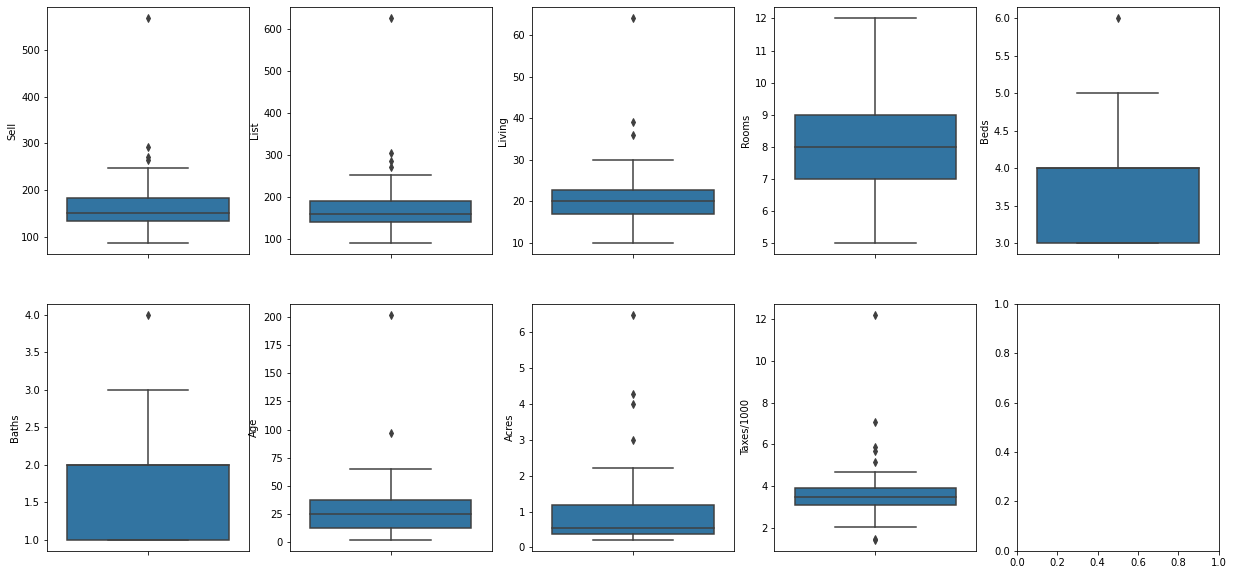

In [420]:
fig, ax = plt.subplots(2, 5, figsize=(21, 10))
sns.boxplot(ax=ax[0][0], data=data['Sell']).set(xticklabels='', ylabel='Sell')
sns.boxplot(ax=ax[0][1], data=data['List']).set(xticklabels='', ylabel='List')
sns.boxplot(ax=ax[0][2], data=data['Living']).set(xticklabels='', ylabel='Living')
sns.boxplot(ax=ax[0][3], data=data['Rooms']).set(xticklabels='', ylabel='Rooms')
sns.boxplot(ax=ax[0][4], data=data['Beds']).set(xticklabels='', ylabel='Beds')
sns.boxplot(ax=ax[1][0], data=data['Baths']).set(xticklabels='', ylabel='Baths')
sns.boxplot(ax=ax[1][1], data=data['Age']).set(xticklabels='', ylabel='Age')
sns.boxplot(ax=ax[1][2], data=data['Acres']).set(xticklabels='', ylabel='Acres')
sns.boxplot(ax=ax[1][3], data=data['Taxes']/1000).set(xticklabels='', ylabel='Taxes/1000');

Вначале разберёмся с категориальными/ дискретными признаками.

In [374]:
data['Rooms'].value_counts().sort_index()

5      1
6      3
7     11
8     21
9      8
10     4
11     1
12     1
Name: Rooms, dtype: int64

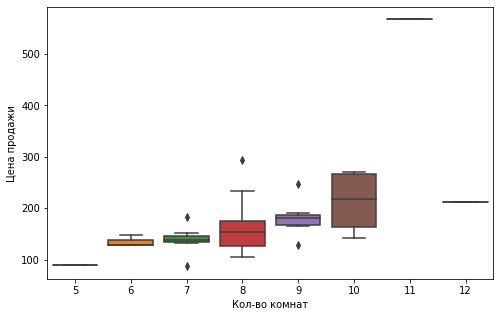

In [375]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Rooms', y='Sell', data=data).set(xlabel='Кол-во комнат', ylabel='Цена продажи');

In [376]:
data['Beds'].value_counts().sort_index()

3    16
4    28
5     5
6     1
Name: Beds, dtype: int64

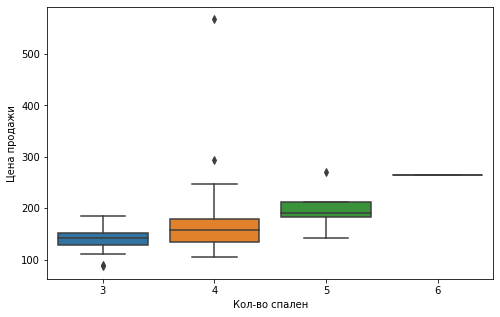

In [377]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Beds', y='Sell', data=data).set(xlabel='Кол-во спален', ylabel='Цена продажи');

In [378]:
data['Baths'].value_counts().sort_index()

1    17
2    24
3     8
4     1
Name: Baths, dtype: int64

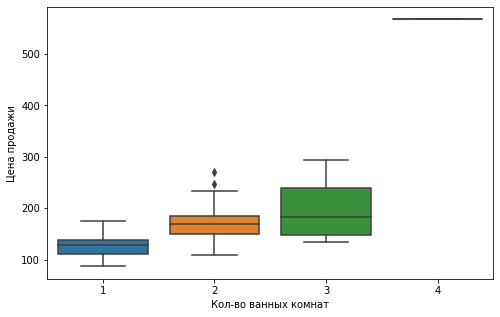

In [379]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Baths', y='Sell', data=data).set(xlabel='Кол-во ванных комнат', ylabel='Цена продажи');

Пока вроде бы линейная взаимосвязь прослеживается между признаками и ценой продажи - пока не будут их категоризовать.

Посмотрим на гистограммы и диаграммы рассеяния для всех признаков.

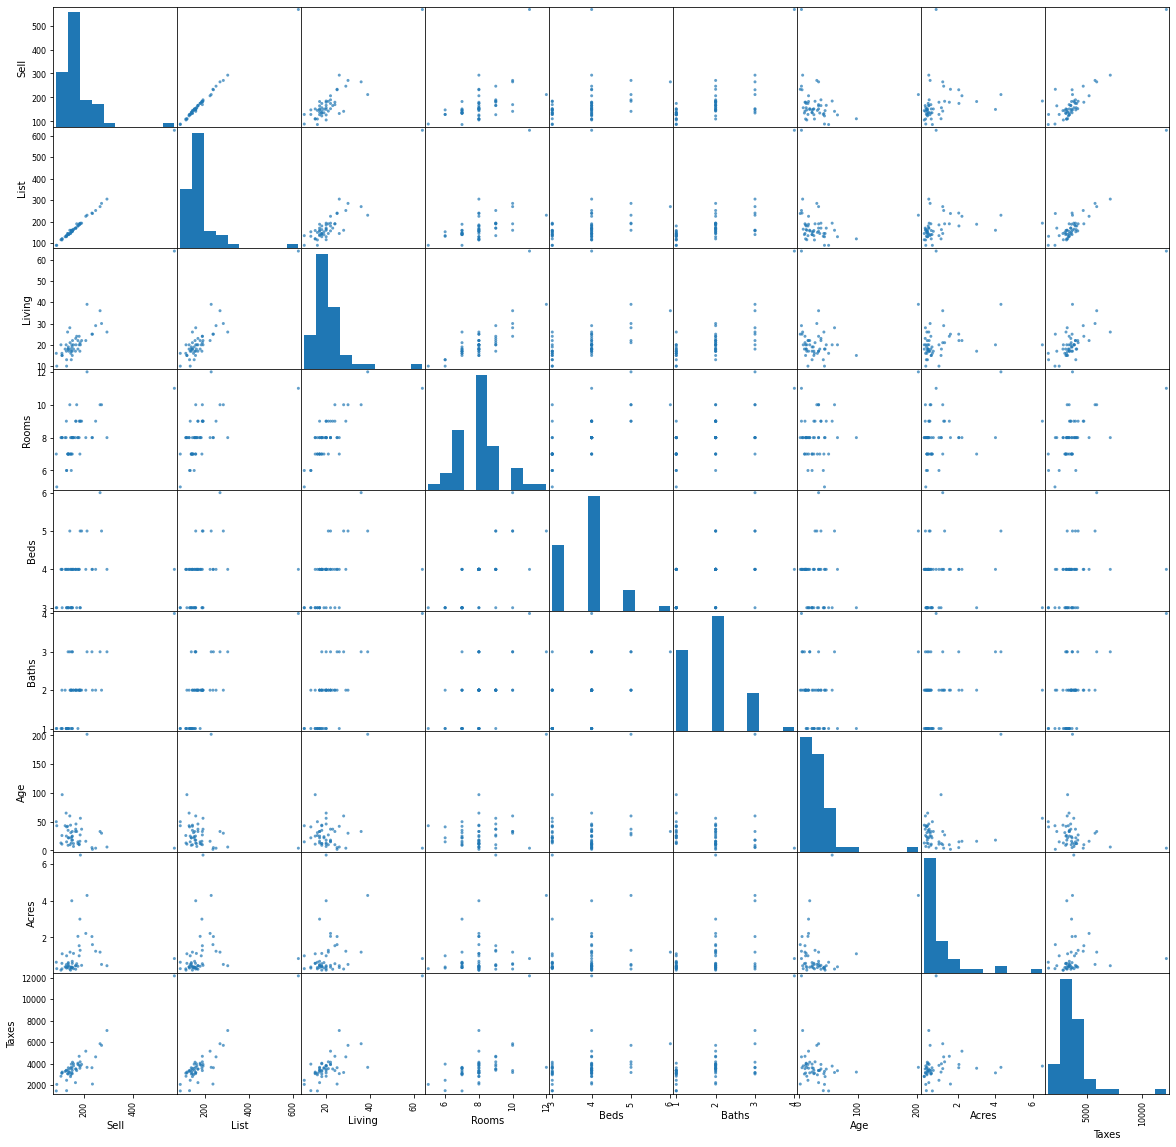

In [380]:
pd.plotting.scatter_matrix(data, figsize=(20, 20), alpha=0.7);

Детальнее посмотрим на взаимосвязь между ценой продажи и запрашиваемой ценой.

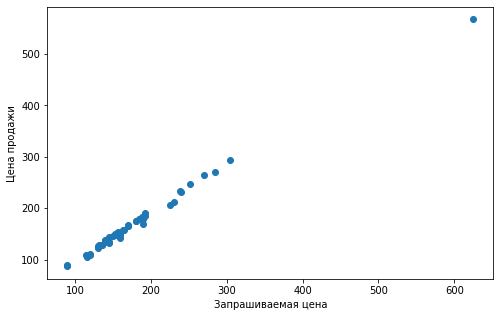

In [381]:
plt.figure(figsize=(8,5))
plt.scatter(data['List'], data['Sell'])
plt.xlabel('Запрашиваемая цена')
plt.ylabel('Цена продажи')
plt.show();

Между показателями явно существует сильная линейная корреляция. Оценим коэффициент корреляции Пирсона:

In [382]:
stats.pearsonr(data['List'], data['Sell'])

(0.9974326270722508, 1.256595937602148e-56)

Да, практически единичная корреляция. В этом случае наверняка при совместном включении каких-либо других переменных вместе с запрашиваемой ценой в регрессию они будут статистически незначимыми.

Логарифмируем зависимую и некоторые объясняющие переменные - там, где есть отклонения от нормального распределения и где проглядывает возможная нелинейность в зависимости цены продажи от этих признаков. Не буду логарифмировать возраст жилого помещения и количество различных комнат, т.к. это сделает интерпретацию эффектов при этих переменных несколько "странной"/ бессмысленной.

In [383]:
data['Sell_ln'] = np.log(data['Sell'])
data['List_ln'] = np.log(data['List'])
data['Living_ln'] = np.log(data['Living'])
data['Acres_ln'] = np.log(data['Acres'])
data['Taxes_ln'] = np.log(data['Taxes'])

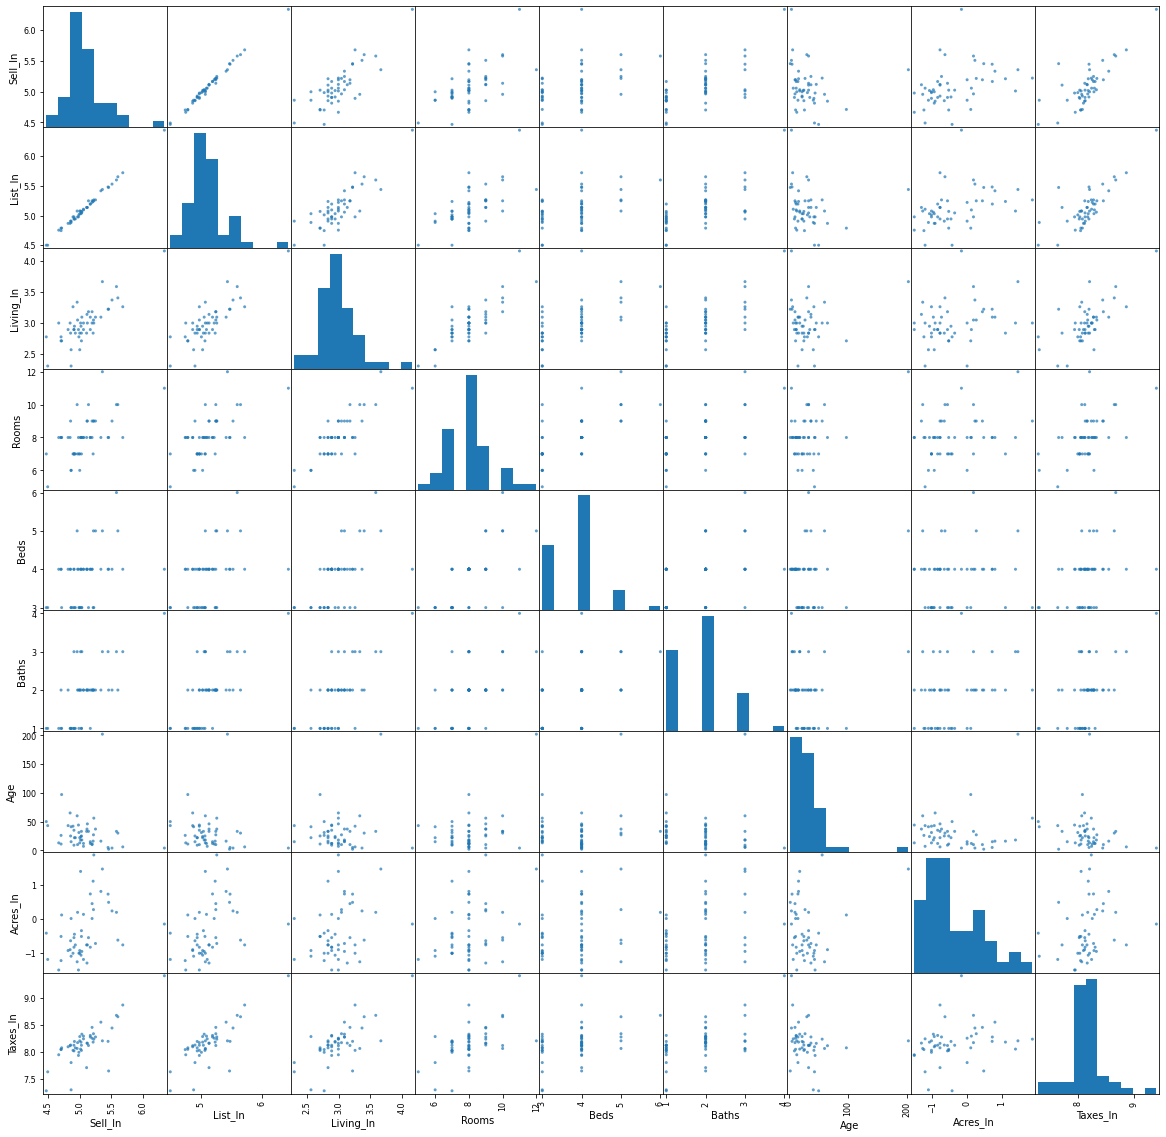

In [384]:
x_num = ['List_ln', 'Living_ln', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres_ln', 'Taxes_ln']
pd.plotting.scatter_matrix(data[['Sell_ln'] + x_num], figsize=(20, 20), alpha=0.7);

Так стало лучше, хотя есть подозрение относительно наличия, как минимум, одного выброса - это самый дорогой дом - для двумерных распределений с некоторыми характеристиками она явно выбивается сильно из общего "поля". Посмотрим по остаткам регрессионного уравнения - если и там это наблюдение будет создавать проблемы, то исключим его.

Теперь посмотрим на линейные корреляции:

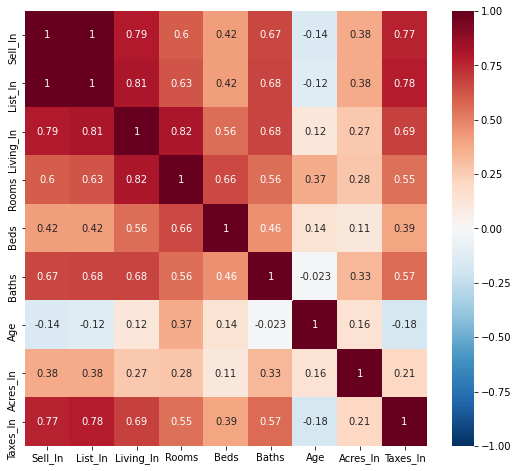

In [385]:
plt.figure(figsize=(9,8))
sns.heatmap(data[['Sell_ln'] + x_num].corr(), annot = True, vmin=-1, vmax=1, cmap='RdBu_r');

Помимо корреляции между ценой продажи и запрашиваемой ценой, сильно коррелированы жилая площадь, с одной стороны, и количество комнат и количество ванных комнат, с другой; а также размер налогов, с одной стороны, и цена продажи и запрашиваемая цена, с другой.

Базовая спецификация без переменной для запрашиваемой цены:

In [386]:
features1 = [i for i in x_num if i != 'List_ln']
ols1 = smf.ols('Sell_ln ~ ' + '+'.join(features1), data=data)
ols1_fit_init = ols1.fit()

print(ols1_fit_init.summary())

                            OLS Regression Results                            
Dep. Variable:                Sell_ln   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     21.95
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           3.87e-12
Time:                        23:30:45   Log-Likelihood:                 24.929
No. Observations:                  50   AIC:                            -33.86
Df Residuals:                      42   BIC:                            -18.56
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1524      0.688      1.676      0.1

Базовая спецификация с переменной для запрашиваемой цены:

In [387]:
features2 = x_num
ols2 = smf.ols('Sell_ln ~ ' + '+'.join(features2), data=data)
ols2_fit_init = ols2.fit()

print(ols2_fit_init.summary())

                            OLS Regression Results                            
Dep. Variable:                Sell_ln   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     894.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.81e-43
Time:                        23:30:46   Log-Likelihood:                 115.67
No. Observations:                  50   AIC:                            -213.3
Df Residuals:                      41   BIC:                            -196.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0162      0.117     -0.138      0.8

Во-первых, видим, что указание на возможную мультиколлинеарность присутствует в обеих спецификациях. При этом вторая спецификация выигрывает по $R^2$, adjusted $R^2$ и AIC.

Для оценки мультиколлинеарности можно использовать variance inflation factor (VIF) для каждого предиктора:

In [388]:
from patsy import dmatrices
y, X1 = dmatrices('Sell_ln ~ ' + '+'.join(features1), data, return_type='dataframe')
vif1 = vif_df(X1)
y, X2 = dmatrices('Sell_ln ~ ' + '+'.join(features2), data, return_type='dataframe')
vif2 = vif_df(X2)

In [389]:
vif1.sort_values('VIF', ascending=False, inplace=True)
vif1[vif1['VIF'] >= 4]

,Variable,VIF
0,Intercept,919.410456
2,Rooms,4.892952
1,Living_ln,4.558682


In [390]:
vif2.sort_values('VIF', ascending=False, inplace=True)
vif2[vif2['VIF'] >= 4]

,Variable,VIF
0,Intercept,984.349010
2,Living_ln,5.856492
1,List_ln,5.284322
3,Rooms,4.900289


Очень сильной мультиколлинеарности нет, но я бы всё-таки исключила из обеих спецификаций переменную для количества комнат или жилой площади.

In [391]:
features1 = [i for i in features1 if i != 'Rooms']
ols1 = smf.ols('Sell_ln ~ ' + '+'.join(features1), data=data)
ols1_fit = ols1.fit()
y, X1 = dmatrices('Sell_ln ~ ' + '+'.join(features1), data, return_type='dataframe')
vif1 = vif_df(X1)
vif1[vif1['VIF'] >= 4]

,Variable,VIF
0,Intercept,859.852122


In [392]:
ols1_fit_init.compare_f_test(ols1_fit)

(0.004534221961324268, 0.9466332555630442, 1.0)

Тест Фишера говорит о том, что исключение кол-ва комнат существенным образом не ухудшило модель.

In [393]:
features2 = [i for i in features2 if i != 'Rooms']
ols2 = smf.ols('Sell_ln ~ ' + '+'.join(features2), data=data)
ols2_fit = ols2.fit()
y, X2 = dmatrices('Sell_ln ~ ' + '+'.join(features2), data, return_type='dataframe')
vif2 = vif_df(X2)
vif2[vif2['VIF'] >= 4]

,Variable,VIF
0,Intercept,919.973519
1,List_ln,5.276411
2,Living_ln,4.471463


In [394]:
ols2_fit_init.compare_f_test(ols2_fit)

(3.644017319389035, 0.06328743030337519, 1.0)

Тест Фишера говорит о том, что исключение кол-ва комнат существенным образом не ухудшило модель.

In [395]:
features2 = [i for i in features2 if i != 'Living_ln']
ols2 = smf.ols('Sell_ln ~ ' + '+'.join(features2), data=data)
ols2_fit = ols2.fit()
y, X2 = dmatrices('Sell_ln ~ ' + '+'.join(features2), data, return_type='dataframe')
vif2 = vif_df(X2)
vif2[vif2['VIF'] >= 4]

,Variable,VIF
0,Intercept,835.339049


In [396]:
ols2_fit_init.compare_f_test(ols2_fit)

(3.8822653136818692, 0.028571699335115993, 2.0)

А вот исключение жилой площади вместе с кол-вом комнат уже значимо уменьшает объясняющую способность модели.

In [397]:
features2 = [i for i in x_num if i != 'Rooms']
ols2 = smf.ols('Sell_ln ~ ' + '+'.join(features2), data=data)
ols2_fit = ols2.fit()

Посмотрим на остатки регрессионных моделей.

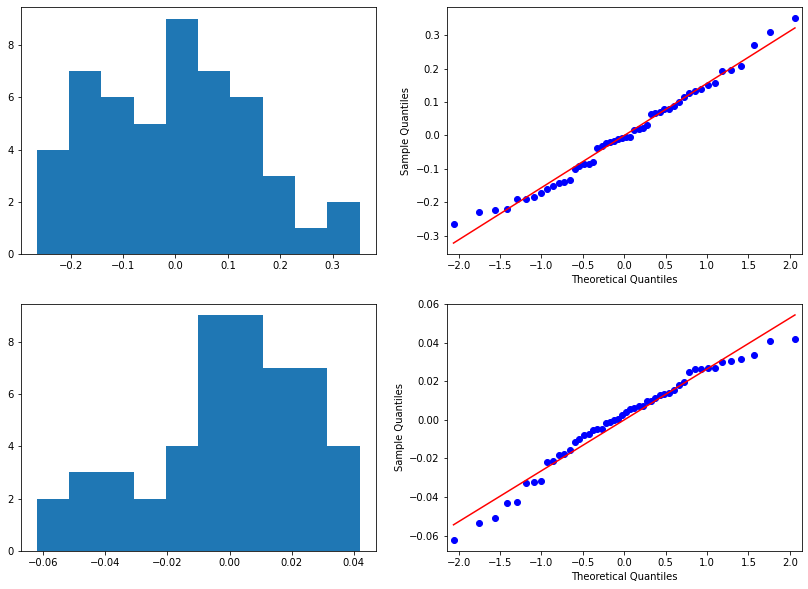

In [398]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ols1_fit.resid.hist(ax=ax[0][0], grid=False)
qqplot(ols1_fit.resid, line='r', ax=ax[0][1])
ols2_fit.resid.hist(ax=ax[1][0], grid=False)
qqplot(ols2_fit.resid, line='r', ax=ax[1][1])
plt.show();

Распределение остатков похоже на нормальное в первой модели, во второй - более значительные отклонения.

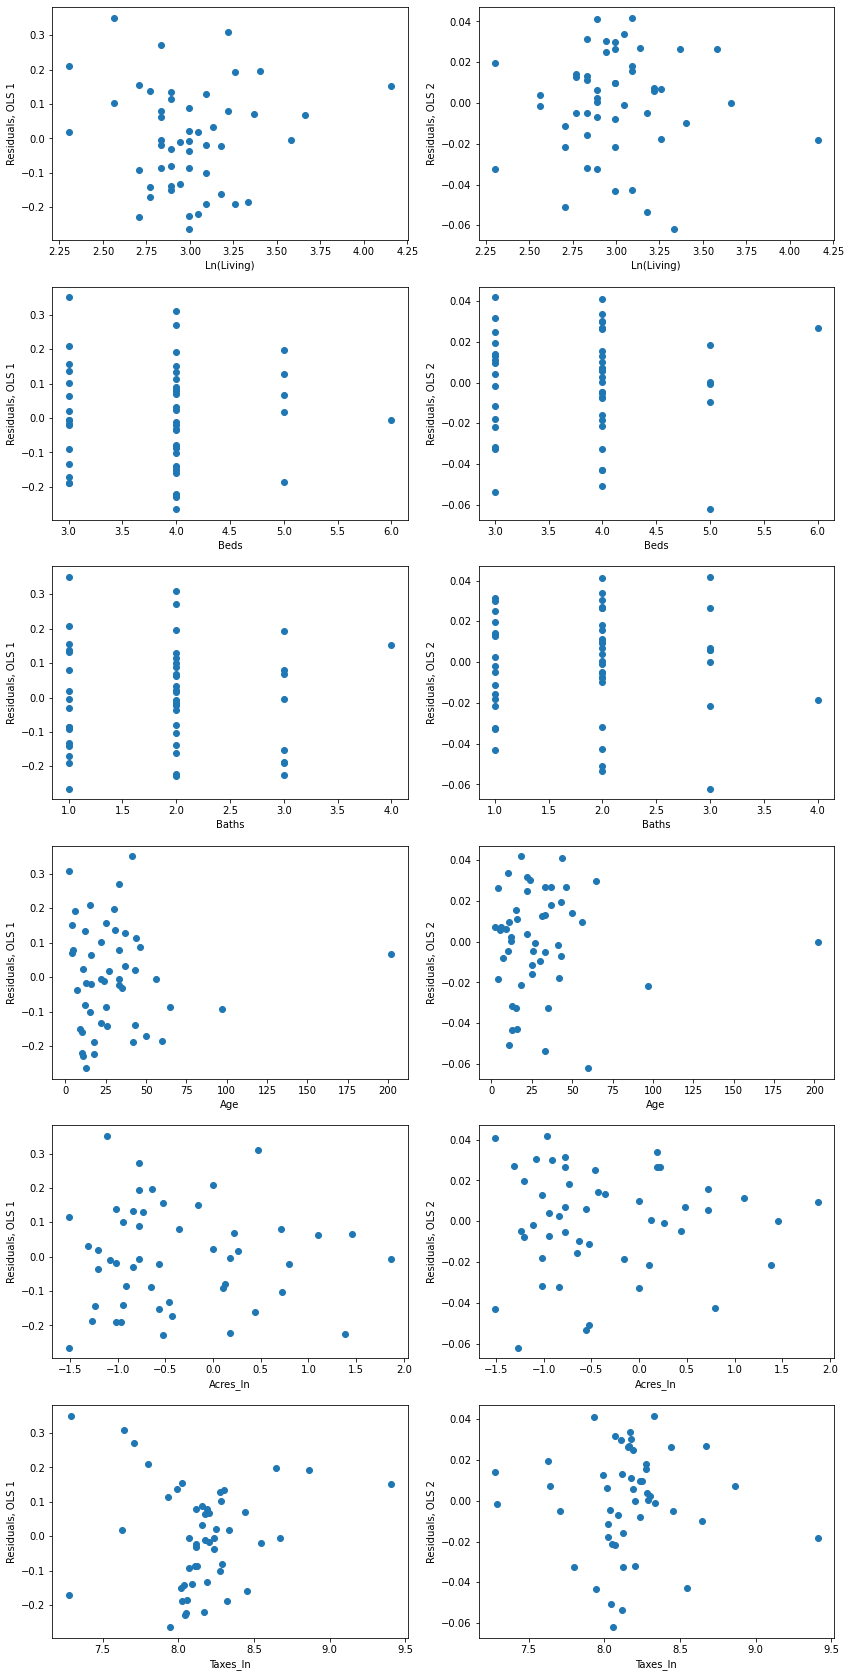

In [399]:
fig, ax = plt.subplots(6, 2, figsize=(14, 30))
ax[0][0].scatter(data['Living_ln'], ols1_fit.resid)
ax[0][0].set_xlabel('Ln(Living)')
ax[0][0].set_ylabel('Residuals, OLS 1')

ax[0][1].scatter(data['Living_ln'], ols2_fit.resid)
ax[0][1].set_xlabel('Ln(Living)')
ax[0][1].set_ylabel('Residuals, OLS 2')

ax[1][0].scatter(data['Beds'], ols1_fit.resid)
ax[1][0].set_xlabel('Beds')
ax[1][0].set_ylabel('Residuals, OLS 1')

ax[1][1].scatter(data['Beds'], ols2_fit.resid)
ax[1][1].set_xlabel('Beds')
ax[1][1].set_ylabel('Residuals, OLS 2')

ax[2][0].scatter(data['Baths'], ols1_fit.resid)
ax[2][0].set_xlabel('Baths')
ax[2][0].set_ylabel('Residuals, OLS 1')

ax[2][1].scatter(data['Baths'], ols2_fit.resid)
ax[2][1].set_xlabel('Baths')
ax[2][1].set_ylabel('Residuals, OLS 2')

ax[3][0].scatter(data['Age'], ols1_fit.resid)
ax[3][0].set_xlabel('Age')
ax[3][0].set_ylabel('Residuals, OLS 1')

ax[3][1].scatter(data['Age'], ols2_fit.resid)
ax[3][1].set_xlabel('Age')
ax[3][1].set_ylabel('Residuals, OLS 2')

ax[4][0].scatter(data['Acres_ln'], ols1_fit.resid)
ax[4][0].set_xlabel('Acres_ln')
ax[4][0].set_ylabel('Residuals, OLS 1')

ax[4][1].scatter(data['Acres_ln'], ols2_fit.resid)
ax[4][1].set_xlabel('Acres_ln')
ax[4][1].set_ylabel('Residuals, OLS 2')

ax[5][0].scatter(data['Taxes_ln'], ols1_fit.resid)
ax[5][0].set_xlabel('Taxes_ln')
ax[5][0].set_ylabel('Residuals, OLS 1')

ax[5][1].scatter(data['Taxes_ln'], ols2_fit.resid)
ax[5][1].set_xlabel('Taxes_ln')
ax[5][1].set_ylabel('Residuals, OLS 2')

plt.show();

Признаков гетероскедастичности не вижу.

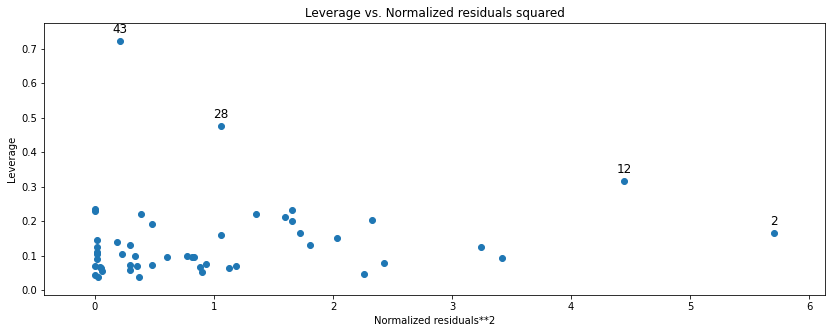

In [400]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plt.rc("figure", figsize=(14,5))
plot_leverage_resid2(ols1_fit)
plt.show();

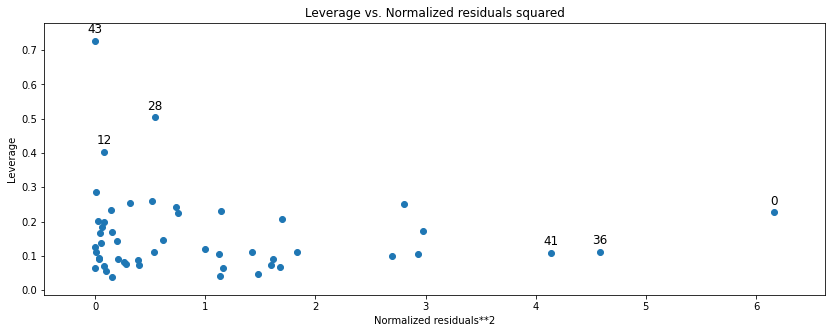

In [401]:
plt.rc("figure", figsize=(14,5))
plot_leverage_resid2(ols2_fit)
plt.show();

In [402]:
data.loc[[43, 28, 12, 0, 2, 36, 41]]

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes,Sell_ln,List_ln,Living_ln,Acres_ln,Taxes_ln
43,212,230,39,12,5,3,202,4.29,3648,5.356586,5.438079,3.663562,1.456287,8.201934
28,567,625,64,11,4,4,4,0.85,12192,6.340359,6.437752,4.158883,-0.162519,9.408535
12,234,238,25,8,4,2,2,1.61,2087,5.455321,5.472271,3.218876,0.476234,7.643483
0,142,160,28,10,5,3,60,0.28,3167,4.955827,5.075174,3.332205,-1.272966,8.060540
2,129,132,13,6,3,1,41,0.33,1471,4.859812,4.882802,2.564949,-1.108663,7.293698
36,170,190,24,10,3,2,33,0.57,3346,5.135798,5.247024,3.178054,-0.562119,8.115521
41,110,120,15,8,4,2,11,0.59,3119,4.700480,4.787492,2.708050,-0.527633,8.045268


Первые два наблюдения могут рассматриваться как выбросы в обеих регрессиях - это самый дорогой дом и самый старый. Попробуем их исключить.

In [403]:
ols1 = smf.ols('Sell_ln ~ ' + '+'.join(features1), data=data[~ data.index.isin([43, 28, 12, 2])])
ols1_fit = ols1.fit()

In [404]:
ols2 = smf.ols('Sell_ln ~ ' + '+'.join(features2), data=data[~ data.index.isin([43, 28, 12, 0, 41, 36])])
ols2_fit = ols2.fit()

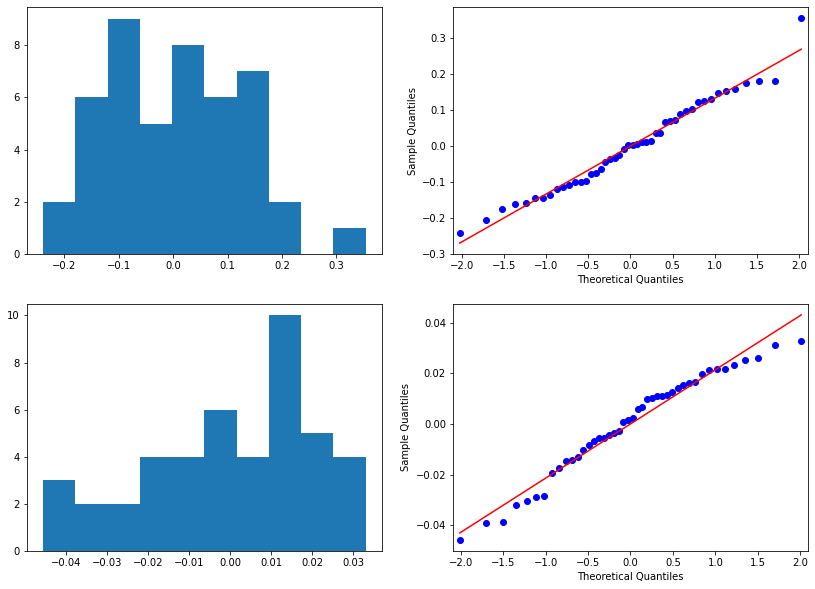

In [405]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ols1_fit.resid.hist(ax=ax[0][0], grid=False)
qqplot(ols1_fit.resid, line='r', ax=ax[0][1])
ols2_fit.resid.hist(ax=ax[1][0], grid=False)
qqplot(ols2_fit.resid, line='r', ax=ax[1][1])
plt.show();

In [406]:
print(ols1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Sell_ln   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           4.58e-11
Time:                        23:31:14   Log-Likelihood:                 30.533
No. Observations:                  46   AIC:                            -47.07
Df Residuals:                      39   BIC:                            -34.27
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0891      0.749     -0.119      0.9

На 5%-ном уровне значимости с ценой продажи связаны: жилая площадь (при её увеличении на 1% цена продажи возрастает на 27.2%), кол-во налогов (при его увеличении на 1% цена продажи возрастает на 52.7%). Регрессия объясняет 77% дисперсии цены продажи.

In [421]:
print(ols2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Sell_ln   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     860.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           4.35e-38
Time:                        23:58:28   Log-Likelihood:                 109.33
No. Observations:                  44   AIC:                            -202.7
Df Residuals:                      36   BIC:                            -188.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0416      0.117      0.356      0.7

На 5%-ном уровне значимости с ценой продажи связаны: запрашиваемая цена (при её увеличении на 1% цена продажи возрастает на 100.3%). Остальные переменные в этой регрессии, как и ожидалось, незначимы. Регрессия объясняет 99% дисперсии цены продажи.